In [25]:
import convokit
from convokit import Corpus, download
import pandas as pd

import numpy as np
from tqdm import tqdm
from collections import defaultdict

from convokit import Corpus, Speaker, Utterance
from convokit import download

from pandas import DataFrame
from typing import List, Dict, Set

import ssl


ssl._create_default_https_context = ssl._create_unverified_context

In [26]:
path = '../../data/'
df_data = pd.read_csv(path + 'Repos_comments50.csv')
No = df_data.No.values.tolist()
mainline_repo = df_data.mainline_repo.values.tolist()
variant_repo = df_data.variant_repo.values.tolist()
ml_comments_after = df_data.ml_comments_before.values.tolist()
ml_comments_before = df_data.ml_comments_after.values.tolist()
vr_comments = df_data.vr_commets.values.tolist()
len(ml_comments_after[0])
ml_comments_before[0]

'- The `devDependency` [rollup-plugin-sourcemaps](https://github.com/maxdavidson/rollup-plugin-sourcemaps) was updated from `0.4.2` to `0.6.1`.\n\n[Update to this version instead 🚀](https://github.com/ember-fastboot/simple-dom/compare/master...ember-fastboot:greenkeeper%2Frollup-plugin-sourcemaps-0.6.1) \n \n\n<details>\n<summary>Commits</summary>\n<p>The new version differs by 4 commits.</p>\n<ul>\n<li><a href="https://urls.greenkeeper.io/maxdavidson/rollup-plugin-sourcemaps/commit/51009618b0eee7ecb93cda2259b117b90be6f84c"><code>5100961</code></a> <code>0.6.1</code></li>\n<li><a href="https://urls.greenkeeper.io/maxdavidson/rollup-plugin-sourcemaps/commit/088d77ed371e42b765dd6e4452b9f5cccc57b1c8"><code>088d77e</code></a> <code>Make sure all exposed paths are properly relative</code></li>\n<li><a href="https://urls.greenkeeper.io/maxdavidson/rollup-plugin-sourcemaps/commit/48150087f0256e62448b329122dc5719c01ce86c"><code>4815008</code></a> <code>Fix: invalid exports for main target.</co

In [27]:
wiki_corpus = Corpus(download("wikipedia-politeness-corpus"))

Dataset already exists at /Users/businge/.convokit/downloads/wikipedia-politeness-corpus


In [28]:
from convokit import TextParser
parser = TextParser(verbosity=1000)

In [29]:
wiki_corpus = parser.transform(wiki_corpus)

1000/4353 utterances processed
2000/4353 utterances processed
3000/4353 utterances processed
4000/4353 utterances processed
4353/4353 utterances processed


In [30]:
from convokit import PolitenessStrategies
ps = PolitenessStrategies()

In [31]:
wiki_corpus = ps.transform(wiki_corpus, markers=True)

In [32]:
wiki_corpus.get_utterance('434044').meta

{'Normalized Score': 0.6945444785369653,
 'Binary': 1,
 'Annotations': {'A233ONYNWKDIYF': 17,
  'A1QV3X9YMQQ3OQ': 22,
  'A3OW54MEVDKXJL': 17,
  'A1JK9DYKWYZZEK': 17,
  'AZ1RJVNOZFIWV': 18},
 'parsed': [{'rt': 7,
   'toks': [{'tok': 'hey', 'tag': 'UH', 'dep': 'intj', 'up': 1, 'dn': []},
    {'tok': 'mbk', 'tag': 'NNP', 'dep': 'dep', 'up': 7, 'dn': [0]},
    {'tok': ';', 'tag': ':', 'dep': 'punct', 'up': 7, 'dn': []},
    {'tok': 'well', 'tag': 'UH', 'dep': 'intj', 'up': 7, 'dn': []},
    {'tok': ',', 'tag': ',', 'dep': 'punct', 'up': 7, 'dn': []},
    {'tok': 'i', 'tag': 'PRP', 'dep': 'nsubj', 'up': 7, 'dn': []},
    {'tok': "'ve", 'tag': 'VB', 'dep': 'aux', 'up': 7, 'dn': []},
    {'tok': 'got', 'tag': 'VBN', 'dep': 'ROOT', 'dn': [1, 2, 3, 4, 5, 6, 9]},
    {'tok': 'to', 'tag': 'TO', 'dep': 'aux', 'up': 9, 'dn': []},
    {'tok': 'be', 'tag': 'VB', 'dep': 'xcomp', 'up': 7, 'dn': [8, 10]},
    {'tok': 'honest', 'tag': 'JJ', 'dep': 'acomp', 'up': 9, 'dn': []}]},
  {'rt': 12,
   'toks': [{

In [17]:
utt = wiki_corpus.get_utterance('434044')
print("RAW TEXT: " + ml_comments_before[0] + "\n")
for ((k,v),(k1,v2)) in zip(utt.meta["politeness_strategies"].items(),utt.meta["politeness_markers"].items()):
    if v != 0:
        print(k[21:len(k)-2] + " results:")
        print("Markers: " + str(v2) + "\n")

RAW TEXT: - The `devDependency` [rollup-plugin-sourcemaps](https://github.com/maxdavidson/rollup-plugin-sourcemaps) was updated from `0.4.2` to `0.6.1`.

[Update to this version instead 🚀](https://github.com/ember-fastboot/simple-dom/compare/master...ember-fastboot:greenkeeper%2Frollup-plugin-sourcemaps-0.6.1) 
 

<details>
<summary>Commits</summary>
<p>The new version differs by 4 commits.</p>
<ul>
<li><a href="https://urls.greenkeeper.io/maxdavidson/rollup-plugin-sourcemaps/commit/51009618b0eee7ecb93cda2259b117b90be6f84c"><code>5100961</code></a> <code>0.6.1</code></li>
<li><a href="https://urls.greenkeeper.io/maxdavidson/rollup-plugin-sourcemaps/commit/088d77ed371e42b765dd6e4452b9f5cccc57b1c8"><code>088d77e</code></a> <code>Make sure all exposed paths are properly relative</code></li>
<li><a href="https://urls.greenkeeper.io/maxdavidson/rollup-plugin-sourcemaps/commit/48150087f0256e62448b329122dc5719c01ce86c"><code>4815008</code></a> <code>Fix: invalid exports for main target.</code

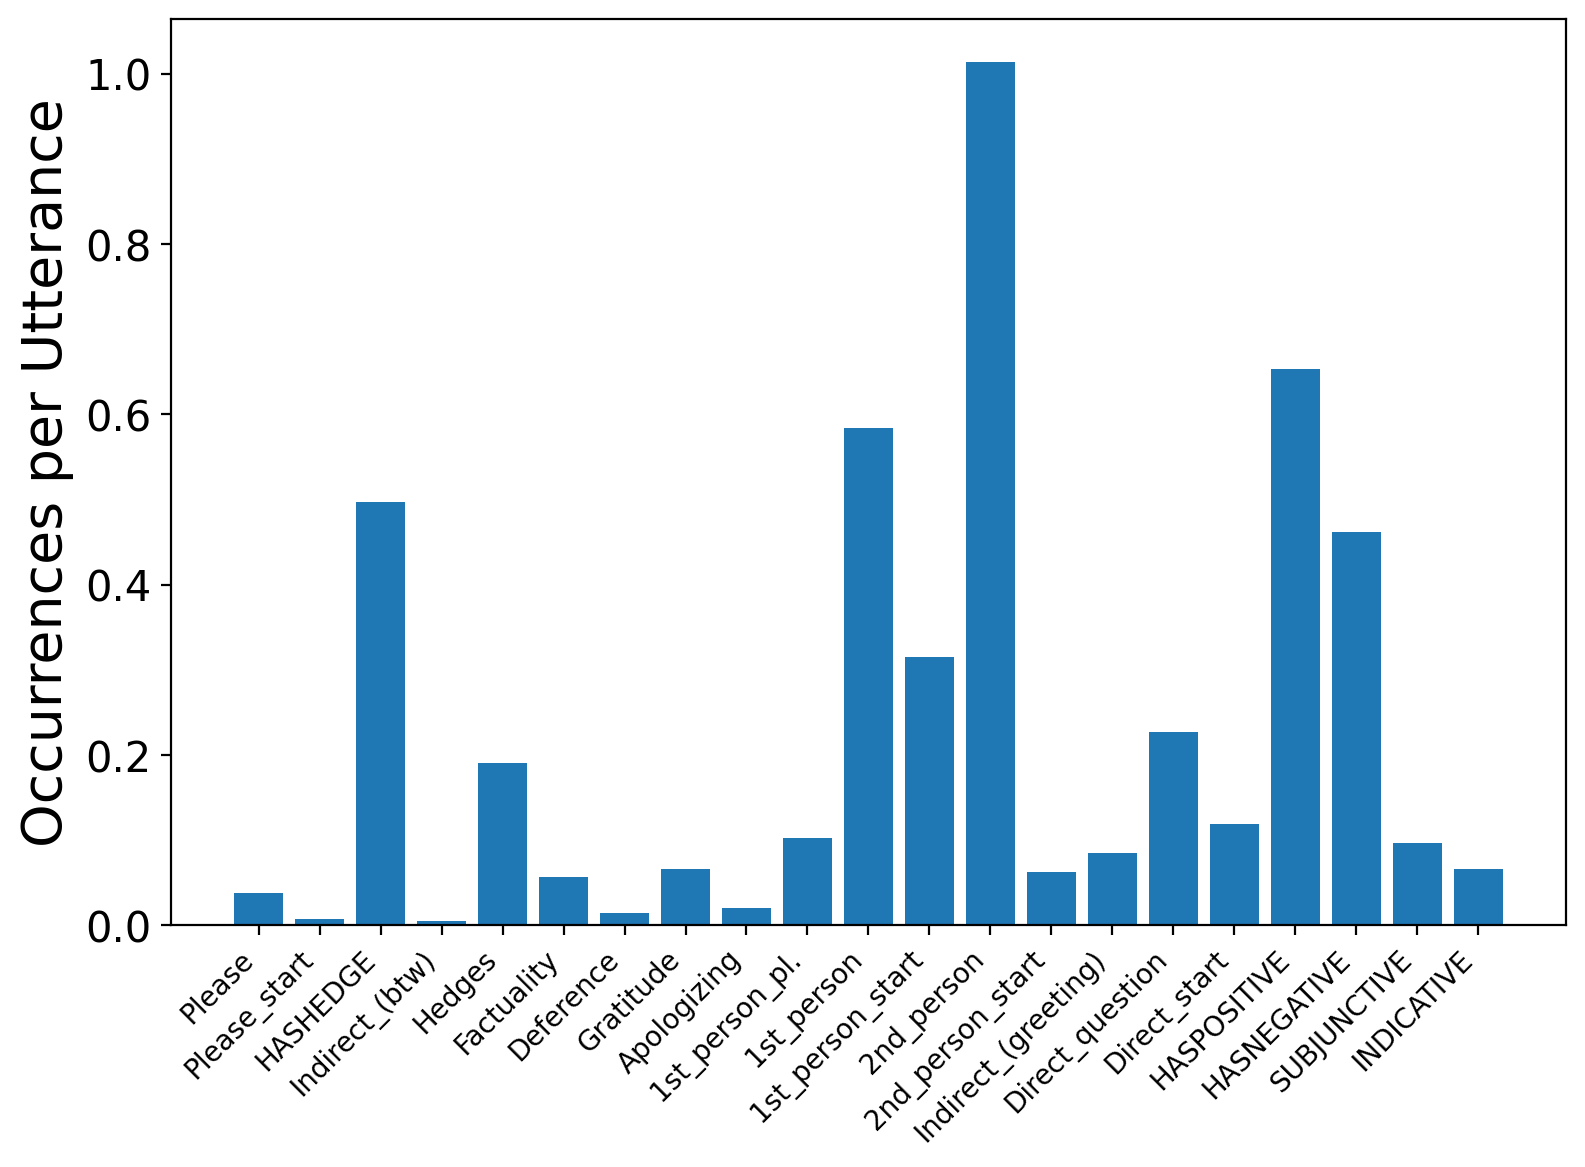

In [18]:
data = ps.summarize(wiki_corpus, plot=True)

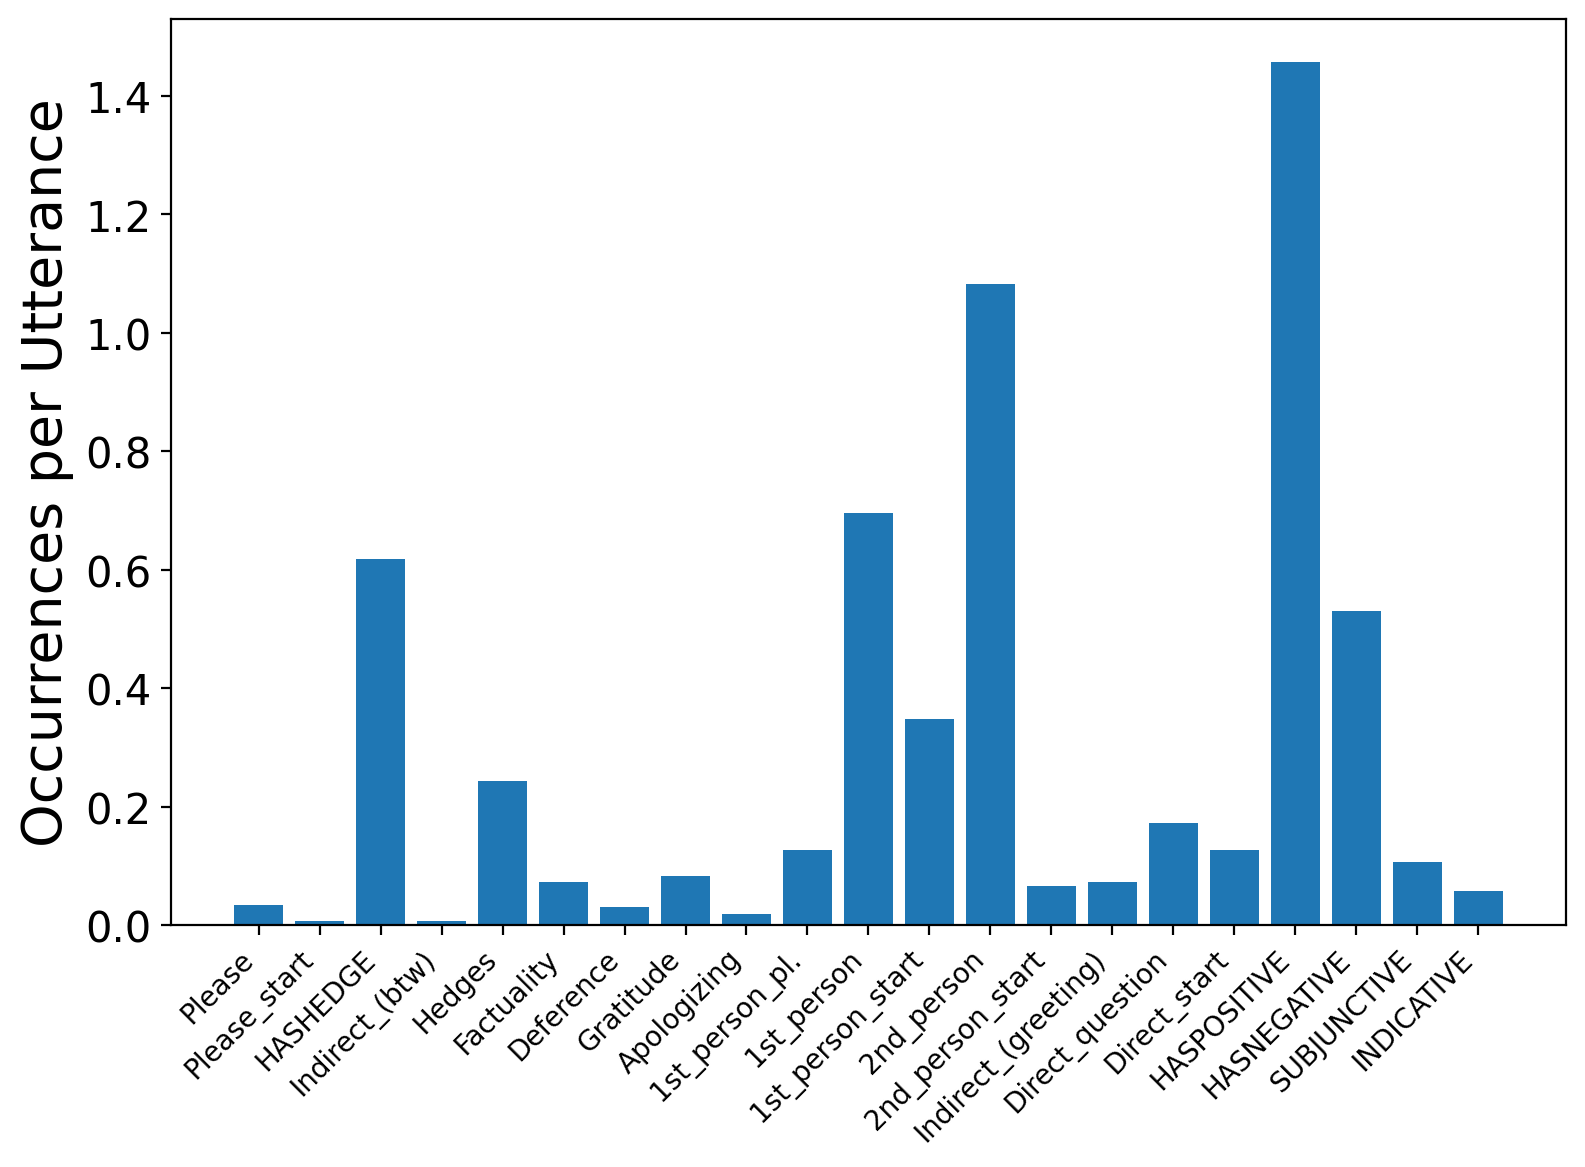

Averages
Please               0.034836
Please_start         0.007172
HASHEDGE             0.618340
Indirect_(btw)       0.007172
Hedges               0.244365
Factuality           0.073770
Deference            0.031762
Gratitude            0.082480
Apologizing          0.018955
1st_person_pl.       0.126537
1st_person           0.696721
1st_person_start     0.347848
2nd_person           1.082992
2nd_person_start     0.067111
Indirect_(greeting)  0.073258
Direct_question      0.172643
Direct_start         0.127049
HASPOSITIVE          1.456455
HASNEGATIVE          0.530225
SUBJUNCTIVE          0.107070
INDICATIVE           0.057377

In [19]:
query = lambda x : x.meta["politeness_strategies"]["feature_politeness_==HASPOSITIVE=="] == 1
positive_data = ps.summarize(wiki_corpus, query, plot = True)
positive_data

In [20]:
import random
from sklearn import svm
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report


In [21]:
from convokit import Classifier

In [22]:
binary_corpus = Corpus(utterances=[utt for utt in wiki_corpus.iter_utterances() if utt.meta["Binary"] != 0])

In [23]:
clf_cv = Classifier(obj_type="utterance",
                        pred_feats=["politeness_strategies"],
                        labeller=lambda utt: utt.meta['Binary'] == 1)

Initialized default classification model (standard scaled logistic regression).


In [24]:
clf_split = Classifier(obj_type="utterance",
                        pred_feats=["politeness_strategies"],
                        labeller=lambda utt: utt.meta['Binary'] == 1)

clf_split.evaluate_with_train_test_split(binary_corpus)


Initialized default classification model (standard scaled logistic regression).
Using corpus objects...
Running a train-test-split evaluation...
Done.


(0.7477064220183486,
 array([[178,  43],
        [ 67, 148]]))

In [123]:
test_ids = binary_corpus.get_utterance_ids()[-100:]
train_corpus = Corpus(utterances=[utt for utt in binary_corpus.iter_utterances() if utt.id not in test_ids])
test_corpus = Corpus(utterances=[utt for utt in binary_corpus.iter_utterances() if utt.id in test_ids])
print("train size = {}, test size = {}".format(len(train_corpus.get_utterance_ids()),
                                               len(test_corpus.get_utterance_ids())))


train size = 2078, test size = 100


In [124]:
clf = Classifier(obj_type="utterance",
                        pred_feats=["politeness_strategies"],
                        labeller=lambda utt: utt.meta['Binary'] == 1)
clf.fit(train_corpus)

test_pred = clf.transform(test_corpus)

Initialized default classification model (standard scaled logistic regression).


In [125]:
clf.summarize(test_pred)

prediction  pred_score
id                            
626728           0    0.030000
622173           0    0.036426
452664           0    0.051439
623952           0    0.067454
621114           0    0.069399
...            ...         ...
628941           1    0.994750
213945           1    0.995886
464868           1    0.996924
358525           1    0.998335
179380           1    0.998412

[100 rows x 2 columns]

In [70]:
from convokit import PolitenessStrategies
import spacy
ps = PolitenessStrategies()
corpus = ps.transform(wiki_corpus, markers=True)

In [71]:
corpus = Corpus(download("wiki-corpus"), utterance_end_index=4000)

parser = TextParser(verbosity=1000)
corpus = parser.transform(corpus)
print()
for ((k,v),(k1,v2)) in zip(utt.meta["politeness_strategies"].items(),utt.meta["politeness_markers"].items()):
    if v != 0:
        print(k[21:len(k)-2] + " results:")
        print("Markers: " + str(v2) + "\n")

KeyError: '480633'